Required imports first!

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# For statistical analysis, and ML
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Configuration
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

Loading the data I cleaned using SQL and exploring it

In [10]:
df = pd.read_csv('cleaned_amazon_data_copy.csv')
# Basic exploration
print(f"Dataset Shape : {df.shape}")
print(f"Dataset Columns : {df.columns.tolist()}")
print(f"Dataset Info : {df.info()}")

Dataset Shape : (723, 11)
Dataset Columns : ['Title', 'Brand', 'Price', 'MRP', 'Discount', 'Rating', 'Review_Count', 'Prime', 'ASIN', 'URL', 'Savings']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         723 non-null    object 
 1   Brand         723 non-null    object 
 2   Price         723 non-null    int64  
 3   MRP           716 non-null    float64
 4   Discount      716 non-null    float64
 5   Rating        723 non-null    float64
 6   Review_Count  723 non-null    int64  
 7   Prime         723 non-null    bool   
 8   ASIN          723 non-null    object 
 9   URL           723 non-null    object 
 10  Savings       716 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 57.3+ KB
Dataset Info : None


In [11]:
df.head()

,Title,Brand,Price,MRP,Discount,Rating,Review_Count,Prime,ASIN,URL,Savings
0,Noise Newly Launched Airwave Max 5 Wireless Ov...,Noise,4999,5999.0,17.0,4.1,131,True,B0DGV6TB8D,https://www.amazon.in/dp/B0DGV6TB8D,1000.0
1,Boult Audio Z20 Pro Truly Wireless Bluetooth E...,Boult,1099,5999.0,82.0,4.0,4321,True,B0D22QWQHR,https://www.amazon.in/dp/B0D22QWQHR,4900.0
2,Sony MDR-EX255AP Wired in-Ear Headphones with ...,Sony,1990,NaN,NaN,4.1,2849,True,B073JQQK1Q,https://www.amazon.in/Sony-MDR-EX255AP-Ear-Hea...,NaN
3,Sony WI-XB400 Wireless Extra Bass in Ear Headp...,Sony,4990,NaN,NaN,4.0,51527,True,B07WTX73MB,https://www.amazon.in/Sony-WI-XB400-Wireless-B...,NaN
4,Bose New QuietComfort Ultra Wireless Noise Can...,Bose,25900,NaN,NaN,3.6,7324,True,B0CD2FSRDD,https://www.amazon.in/Bose-QuietComfort-Cancel...,NaN


Data Preprocessing and Advanced Analysis

In [40]:
# Create additional columns helpful for analysis

df['Price_Range'] = pd.cut(df['Price'], 
                           bins=[0, 500, 1500, 5000, float('inf')], 
                           labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

df['Rating_Category'] = pd.cut(df['Rating'], 
                            bins=[0, 3.5, 4.0, 4.2, 5.0], 
                            labels=['Poor', 'Average', 'Good', 'Excellent'])

# Value Score = Rating per INR 1000 spent
df['Value_Score'] = (df['Rating'] / (df['Price'] / 1000)).round(3)

# Fill missing MRP with Price. Calculate missing Discount and Savings accordingly
df['MRP'] = df['MRP'].fillna(df['Price'])
df['Discount'] = df['Discount'].fillna(0)
df['Savings'] = df['Savings'].fillna(0)


In [17]:
df.head()

,Title,Brand,Price,MRP,Discount,Rating,Review_Count,Prime,ASIN,URL,Savings,Price_Range,Rating_Category,Value_Score
0,Noise Newly Launched Airwave Max 5 Wireless Ov...,Noise,4999,5999.0,17.0,4.1,131,True,B0DGV6TB8D,https://www.amazon.in/dp/B0DGV6TB8D,1000.0,Premium,Good,0.820
1,Boult Audio Z20 Pro Truly Wireless Bluetooth E...,Boult,1099,5999.0,82.0,4.0,4321,True,B0D22QWQHR,https://www.amazon.in/dp/B0D22QWQHR,4900.0,Mid-range,Average,3.640
2,Sony MDR-EX255AP Wired in-Ear Headphones with ...,Sony,1990,1990.0,0.0,4.1,2849,True,B073JQQK1Q,https://www.amazon.in/Sony-MDR-EX255AP-Ear-Hea...,0.0,Premium,Good,2.060
3,Sony WI-XB400 Wireless Extra Bass in Ear Headp...,Sony,4990,4990.0,0.0,4.0,51527,True,B07WTX73MB,https://www.amazon.in/Sony-WI-XB400-Wireless-B...,0.0,Premium,Average,0.802
4,Bose New QuietComfort Ultra Wireless Noise Can...,Bose,25900,25900.0,0.0,3.6,7324,True,B0CD2FSRDD,https://www.amazon.in/Bose-QuietComfort-Cancel...,0.0,Luxury,Average,0.139


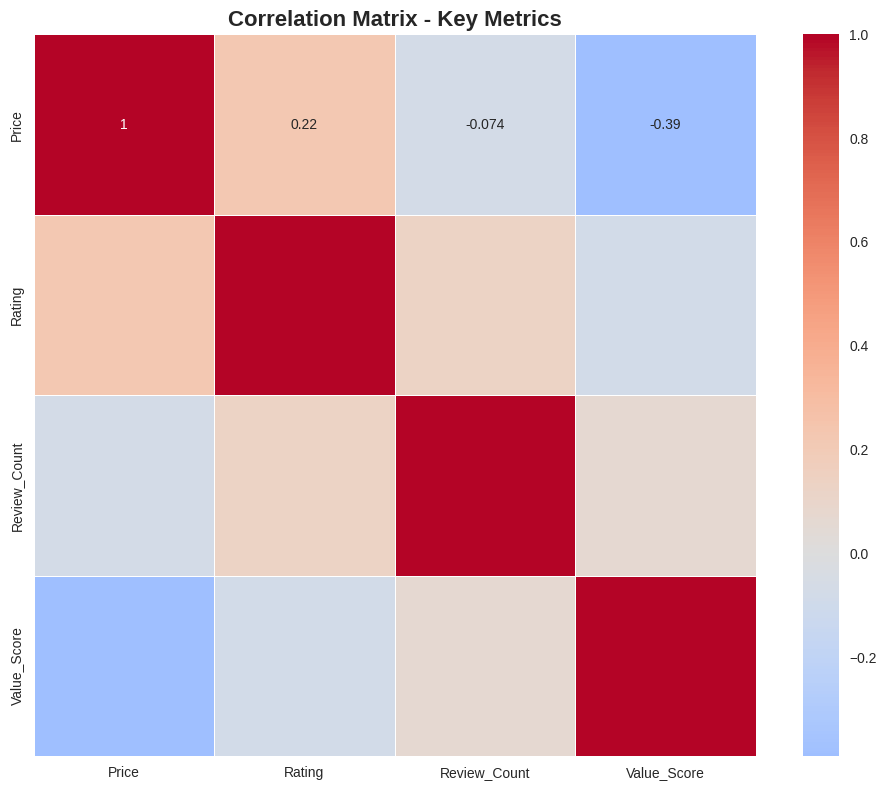

Price-Rating Correlation : 0.225, p-value : 0.000
Price-Reviews Correlation : -0.074, p-value : 0.048


In [19]:
# Advanced Statistical Analysis

# Correlation analysis
numeric_cols = ['Price', 'Rating', 'Review_Count', 'Value_Score']
correlation_matrix = df[numeric_cols].corr()

# Correlation heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Key Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistical significance tests
price_rating_corr, price_rating_p_val = pearsonr(df['Price'].dropna(), df['Rating'].dropna())
print(f"Price-Rating Correlation : {price_rating_corr:.3f}, p-value : {price_rating_p_val:.3f}")

price_reviews_corr, price_reviews_p_val = pearsonr(df['Price'].dropna(), df['Review_Count'].dropna())
print(f"Price-Reviews Correlation : {price_reviews_corr:.3f}, p-value : {price_reviews_p_val:.3f}")

Advanced Visualizations

In [21]:
# Interactive Price vs Rating Scatter Plot
fig = px.scatter(df, x='Price', y='Rating', size='Review_Count', color='Brand',
                 hover_data=['Title', 'Value_Score'], 
                 title='Price vs Rating Analysis (Size = Review Count)', 
                 labels={'Price' : 'Price (₹)', 'Rating' : 'Customer Rating'})
fig.update_layout(height=600, showlegend=True)
fig.show()

# Brand Performance Matrix
brand_metrics = df.groupby('Brand').agg({
    'Price': 'mean', 
    'Rating': 'mean', 
    'Review_Count': 'mean', 
    'Title': 'count'
}).round(2)
brand_metrics.columns = ['Avg_Price', 'Avg_Rating', 'Avg_Reviews', 'Product_Count']
brand_metrics = brand_metrics[brand_metrics['Product_Count'] > 5].sort_values(by='Avg_Rating', ascending=False)

# Brand Positioning Chart
fig = px.scatter(brand_metrics, x='Avg_Price', y='Avg_Rating', size='Product_Count', color='Avg_Reviews', 
                 hover_data=['Product_Count'], 
                 title='Brand Positioning Matrix', 
                 labels={'Avg_Price': 'Average Price (₹)', 'Avg_Rating': 'Average Rating'})
fig.update_layout(height=600, showlegend=True)
fig.show()

print('Top 10 Brand Performance : ')
print(brand_metrics.head(10))

Top 10 Brand Performance : 
            Avg_Price  Avg_Rating  Avg_Reviews  Product_Count
Brand                                                        
soundcore     3348.75        4.19     15574.56             16
OnePlus       3767.10        4.14     62733.80             20
truke          971.73        4.05       942.41             22
CrossBeats    2697.57        4.04      1082.00              7
Sony          6715.75        4.01     15787.93             28
realme        2012.27        4.01     14487.87             30
Redmi         2432.33        4.00      2724.00              6
Samsung       7052.36        3.99      5170.55             11
KZ            1513.00        3.97       421.00              6
Portronics     520.12        3.92       868.00             17


Market Segmentation Analysis

/tmp/ipykernel_5501/2283095165.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



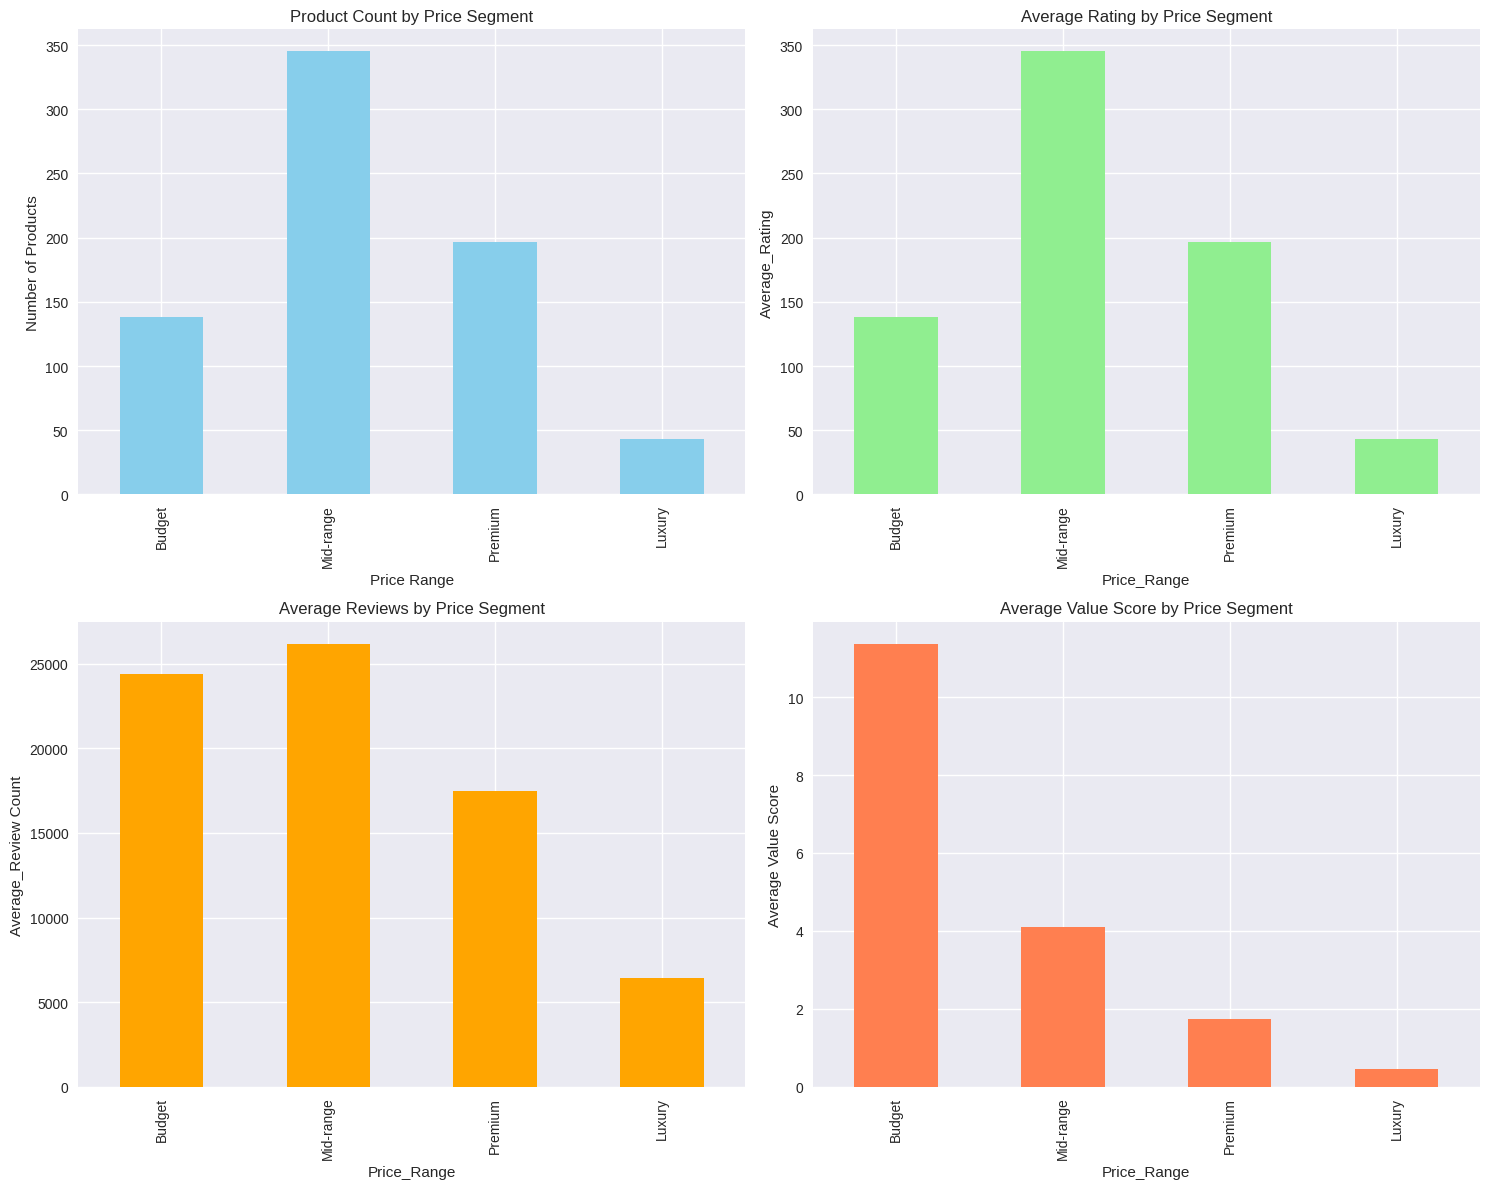

Market Segment Analysis : 
             Product_Count  Avg_Price  Avg_Rating  Avg_Reviews  \
Price_Range                                                      
Budget                 138     362.83        3.69     24373.09   
Mid-range              345     993.10        3.75     26161.17   
Premium                197    2478.13        3.94     17493.59   
Luxury                  43   11318.60        4.10      6458.70   

             Avg_Value_Score  
Price_Range                   
Budget                 11.36  
Mid-range               4.10  
Premium                 1.75  
Luxury                  0.47  


In [27]:
# Price segment analysis
segment_analysis = df.groupby('Price_Range').agg({
    'Title': 'count', 
    'Price': 'mean', 
    'Rating': 'mean', 
    'Review_Count': 'mean', 
    'Value_Score': 'mean'
}).round(2)

segment_analysis.columns = ['Product_Count', 'Avg_Price', 'Avg_Rating', 'Avg_Reviews', 'Avg_Value_Score']

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Product count by price segment
segment_analysis['Product_Count'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Product Count by Price Segment')
axes[0,0].set_ylabel('Number of Products')
axes[0,0].set_xlabel('Price Range')

# Product distribution by price segment
segment_analysis['Product_Count'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Rating by Price Segment')
axes[0, 1].set_ylabel('Average_Rating')

# Average reviews by segment
segment_analysis['Avg_Reviews'].plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Average Reviews by Price Segment')
axes[1, 0].set_ylabel('Average_Review Count')

# Value score by segment
segment_analysis['Avg_Value_Score'].plot(kind='bar', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Average Value Score by Price Segment')
axes[1, 1].set_ylabel('Average Value Score')

plt.tight_layout()
plt.show()

print('Market Segment Analysis : ')
print(segment_analysis)

Clustering Analysis

/home/supernova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/supernova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/supernova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/supernova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/supernova/anaconda3/lib/python3.11/site-packages/sklearn/clust

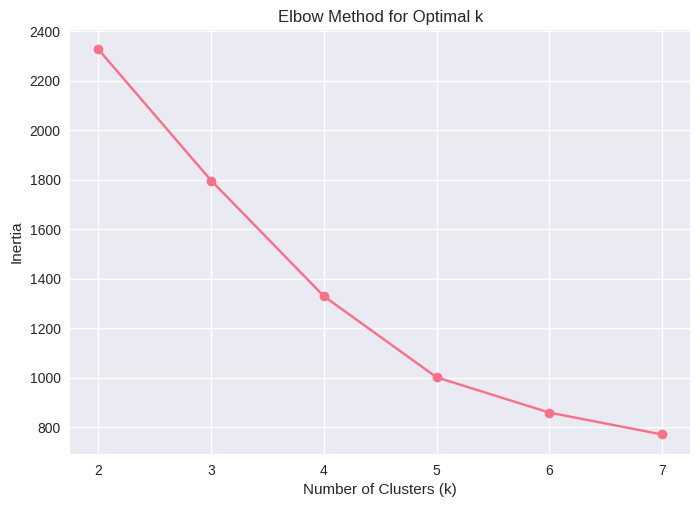

In [32]:
features = df[['Price', 'Rating', 'Review_Count', 'Value_Score']]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Finding optimal value of k (number of clusters) using elbow method
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Elbow at k=4.

**Business Interpretation** - 

Cluster 1 : Budget/Value products

Cluster 2 : Mid-range popular products

Cluster 3 : Premium quality products

Cluster 4 : Luxury/High-end products

/home/supernova/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



            Price  Rating  Review_Count  Value_Score
Cluster                                             
0         1103.30    3.98     242126.51         4.67
1         1690.00    3.79       9533.01         3.34
2        16774.05    4.14       7352.35         0.29
3          319.96    3.81      16250.78        13.01


/home/supernova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/supernova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/supernova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/supernova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



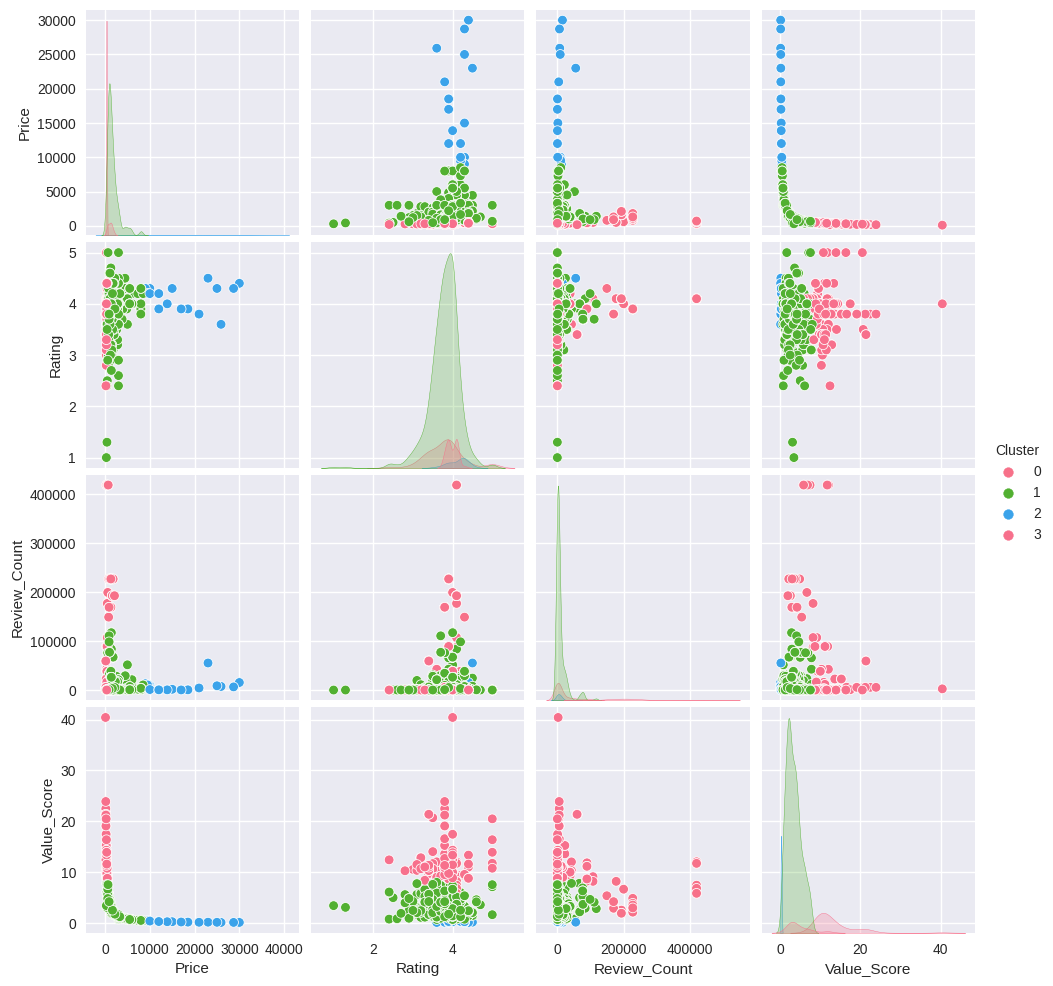

In [33]:
# Choose optimal k, and fit the model
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster analysis
print(df.groupby('Cluster')[['Price', 'Rating', 'Review_Count', 'Value_Score']].mean().round(2))

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=['Price', 'Rating', 'Review_Count', 'Value_Score'], palette='husl')
plt.show()

Regression Analysis 

In [43]:
# Predicting price from Rating, Review_Count
X = df[['Rating', 'Review_Count']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Model evaluation
print(f'R^2 Score : {r2_score(y, y_pred):.3f}')
print('Coefficients : ', dict(zip(X.columns, model.coef_)))
print('Intercept : ', model.intercept_)

R^2 Score : 0.061
Coefficients :  {'Rating': 1868.4615578535645, 'Review_Count': -0.005461842376106595}
Intercept :  -5107.051630033595


R^2 is quite low. Relationship between price and the other variables is not linear. Let's try using Random Forest to capture the non-linearity.

In [ ]:
# Feature Engineering
# Since Brand isn't a numeric column, I'll convert it to one-hot format
preprocessor = ColumnTransformer(
    transformers=[
        ('brand', OneHotEncoder(handle_unknown='ignore'), ['Brand'])
    ],
    remainder='passthrough'
)

X = df[['Brand', 'Rating', 'Review_Count']]
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess with Brand encoding
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

# Predictions
y_pred_train = rf.predict(X_train_processed)
y_pred_test = rf.predict(X_test_processed)

# Evaluation
print(f"Train R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

# Feature Importance
feature_names = preprocessor.named_transformers_['brand'].get_feature_names_out(['Brand'])
feature_names = list(feature_names) + ['Rating', 'Review_Count']

importances = pd.Series(rf.feature_importances_, index=feature_names)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False).head(10))


Train R²: 0.965
Test R²: 0.467
RMSE: 2476.18

Feature Importances:
Rating             0.260187
Brand_Bose         0.240459
Review_Count       0.198182
Brand_Sony         0.094558
Brand_Samsung      0.060093
Brand_Apple        0.035066
Brand_JBL          0.025827
Brand_OnePlus      0.020726
Brand_Marshall     0.011521
Brand_soundcore    0.011496
dtype: float64


Large difference between Train R^2 and Test^2 => Overfitting T^T
Let's apply regularizationnnnn

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=8,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train_processed, y_train)

y_pred_train = rf.predict(X_train_processed)
y_pred_test = rf.predict(X_test_processed)

print(f"Train R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

feature_names = preprocessor.named_transformers_['brand'].get_feature_names_out(['Brand'])
feature_names = list(feature_names) + ['Rating', 'Review_Count']

importances = pd.Series(rf.feature_importances_, index=feature_names)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False).head(10))


Train R²: 0.233
Test R²: 0.205
RMSE: 3023.99

Feature Importances:
Rating                 0.342698
Review_Count           0.143702
Brand_Sony             0.127213
Brand_Samsung          0.099174
Brand_OnePlus          0.063020
Brand_JBL              0.048564
Brand_Amazon Basics    0.026811
Brand_boAt             0.024152
Brand_Boult            0.020926
Brand_ZEBRONICS        0.019149
dtype: float64


Now, the model underfits the data

In [45]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=2,
    max_features=0.8,
    random_state=42
)
rf.fit(X_train_processed, y_train)

y_pred_train = rf.predict(X_train_processed)
y_pred_test = rf.predict(X_test_processed)

print(f"Train R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.2f}")


Train R²: 0.792
Test R²: 0.486
RMSE: 2432.83


Test R^2 isn't great. I'll log transform Price

In [46]:
import numpy as np

# Log transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Train on log-transformed prices
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=2,
    max_features=0.8,
    random_state=42
)
rf.fit(X_train_processed, y_train_log)

# Predict in log space and convert back
y_pred_train_log = rf.predict(X_train_processed)
y_pred_test_log = rf.predict(X_test_processed)

y_pred_train = np.expm1(y_pred_train_log)
y_pred_test = np.expm1(y_pred_test_log)

# Evaluation on original price scale
print(f"Train R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.2f}")


Train R²: 0.586
Test R²: 0.330
RMSE: 2776.82


Log transformation made it worse ugh.

In [52]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=30,
    min_samples_leaf=2,
    max_features=0.8,
    random_state=42
)
rf.fit(X_train_processed, y_train)

y_pred_train = rf.predict(X_train_processed)
y_pred_test = rf.predict(X_test_processed)

print(f"Train R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.2f}")


Train R²: 0.800
Test R²: 0.506
RMSE: 2383.79


model reached saturation

In [53]:
df.head()

,Title,Brand,Price,MRP,Discount,Rating,Review_Count,Prime,ASIN,URL,Savings,Price_Range,Rating_Category,Value_Score
0,Noise Newly Launched Airwave Max 5 Wireless Ov...,Noise,4999,5999.0,17.0,4.1,131,True,B0DGV6TB8D,https://www.amazon.in/dp/B0DGV6TB8D,1000.0,Premium,Good,0.820
1,Boult Audio Z20 Pro Truly Wireless Bluetooth E...,Boult,1099,5999.0,82.0,4.0,4321,True,B0D22QWQHR,https://www.amazon.in/dp/B0D22QWQHR,4900.0,Mid-range,Average,3.640
2,Sony MDR-EX255AP Wired in-Ear Headphones with ...,Sony,1990,1990.0,0.0,4.1,2849,True,B073JQQK1Q,https://www.amazon.in/Sony-MDR-EX255AP-Ear-Hea...,0.0,Premium,Good,2.060
3,Sony WI-XB400 Wireless Extra Bass in Ear Headp...,Sony,4990,4990.0,0.0,4.0,51527,True,B07WTX73MB,https://www.amazon.in/Sony-WI-XB400-Wireless-B...,0.0,Premium,Average,0.802
4,Bose New QuietComfort Ultra Wireless Noise Can...,Bose,25900,25900.0,0.0,3.6,7324,True,B0CD2FSRDD,https://www.amazon.in/Bose-QuietComfort-Cancel...,0.0,Luxury,Average,0.139


In [54]:
df.to_csv('final_amazon_data_analysis.csv', index=False)